# Sentiment Analysis Project: 
 **By Diego Gomez**

This project revolves around the sentiment analysis of various forms of text using the 'syuzhet' library in R. The intent is to show the flexibility of sentiment analysis and its applications. Whether it is text from the news, blog, or book, I hope that this project can guide readers to conduct their own sentiment analysis so that they can derive interesting conclusions. 

Note:
You might have to install syuzhet using "install.packages"

In [3]:
#install.packages("syuzhet")
library(syuzhet)

Warning message:
"package 'syuzhet' was built under R version 3.6.3"


### Simple Sentiment Analysis
 
Note: The following is made up text. Feel free to replace the text with your own. Just be sure to write in complete sentences so that the sentiment analysis can work as designed.

In [4]:
Example_Text <- "I begin this story with a neutral statement.  
  Basically this is a very silly test.  
  You are testing the Syuzhet package using short, inane sentences.  
  I am actually very happy today. 
  I have finally finished writing this package.  
  Tomorrow I will be very sad. 
  I won't have anything left to do. 
  I might get angry and decide to do something horrible.  
  I might destroy the entire package and start from scratch.  
  Then again, I might find it satisfying to have completed my first R package. 
  Honestly this use of the Fourier transformation is really quite elegant.  
  You might even say it's beautiful!"

In [6]:
#breaks up text into individual sentences 
sentences <- get_sentences(Example_Text)

In [7]:
sentences

[1] "I begin this story with a neutral statement."                                
 [2] "Basically this is a very silly test."                                        
 [3] "You are testing the Syuzhet package using short, inane sentences."           
 [4] "I am actually very happy today."                                             
 [5] "I have finally finished writing this package."                               
 [6] "Tomorrow I will be very sad."                                                
 [7] "I won't have anything left to do."                                           
 [8] "I might get angry and decide to do something horrible."                      
 [9] "I might destroy the entire package and start from scratch."                  
[10] "Then again, I might find it satisfying to have completed my first R package."
[11] "Honestly this use of the Fourier transformation is really quite elegant."    
[12] "You might even say it's beautiful!"

In [8]:
#gets sentiment for each sentence
syuzhet_vector <- get_sentiment(sentences, method="syuzhet")

In [9]:
syuzhet_vector

[1]  0.00 -0.25 -0.50  0.75  0.40 -0.50  0.00 -1.50 -1.10  1.00  1.00  0.75

Interpretation: 
The vector above gives a sentiment score for each of the sentences. Negative scores indicate a negative sentiment while positive scores indicate a positive sentiment. 

#### Plotting the Sentiment

Let us plot the sentiment of the sentences to get an idea about how the sentiment changes from sentence to sentence. 

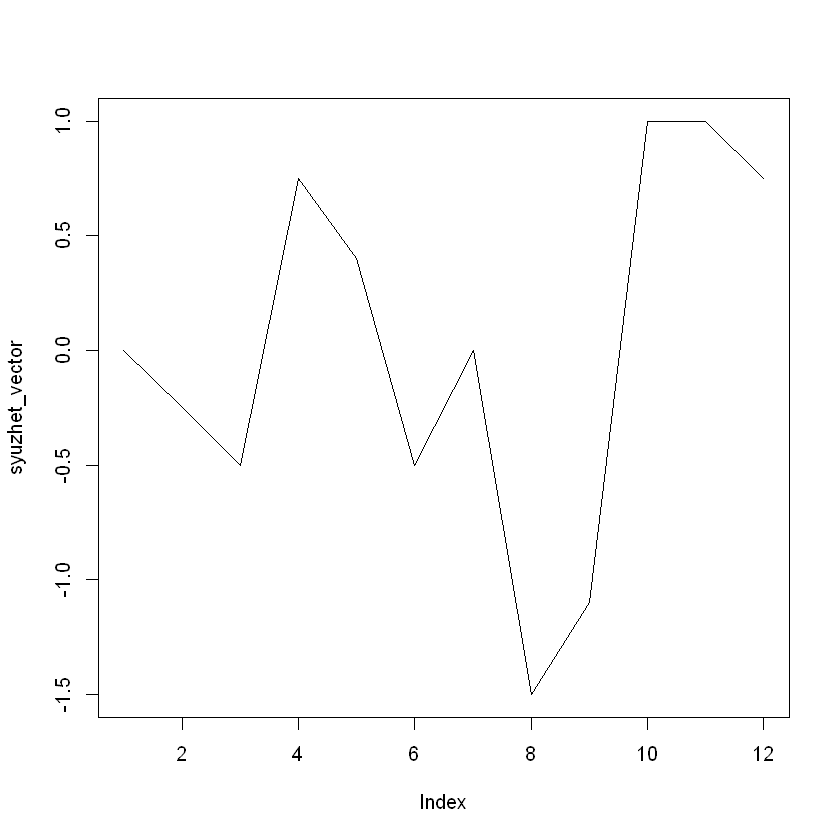

In [11]:
plot(syuzhet_vector,type="l")

#### Let us get the Valence and Emotions expressed in each sentence using get_nrc_sentiment()

In [14]:
class(get_nrc_sentiment(sentences))

[1] "data.frame"

In [20]:
#data frame with the valence and emotions expressed in each of the sentences
sent_val <- get_nrc_sentiment(sentences)
sent_val

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,0,0,0,2,0,1
0,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,1,0,0,1,0,0,1,0,1
0,1,1,0,1,0,1,1,0,1
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,2,0
0,1,0,0,0,0,0,0,0,0


In [17]:
#get overall sentiment rating; it appears passage is slightly positive
mean(sent_valence$positive - sent_valence$negative)

[1] 0.08333333

In [21]:
#get index of sentences where anger greater than 0
ns[sent_valence$anger > 0,]

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,2,0,2,1,0,0,0,0,2,0


In [22]:
#lets look at that sentence to determine accuracy 
sentences[8]

[1] "I might get angry and decide to do something horrible."

## Wildfires News Report (NBCNEWS) Sentiment Analysis

The following is the content of a news article about California wildfires. Feel free to follow the link for more details.

https://www.nbcnews.com/storyline/western-wildfires/one-killed-major-wildfires-ignite-overnight-across-northern-california-n809206

In [23]:
fire_report <- " LOS ANGELES — Fierce wildfires whipping up nightmare conditions in Northern California have killed at least 15 people, destroyed more than 1,500 structures and turned wineries into charred wastelands.

The death toll continued to climb Tuesday as fire crews battled at least 17 large fires, while more than 20,000 people in the paths of the fast-moving infernos fled their homes, the California Department of Forestry and Fire Protection, or Cal Fire, said. In all, more than 115,000 acres have burned since the weekend, officials added.

Firefighters were counting on cooler weather and weakening winds to help in their fight.

With increased resources headed to the region, hopefully we'll start seeing some turnaround throughout the course of today and into tomorrow, Scott McLean, deputy chief of Cal Fire, said Tuesday on TODAY.
[Massive wildfires ravage Northern California, killing at least 11]
Massive wildfires ravage Northern California, killing at least 11 2:39

Gov. Jerry Brown declared an emergency in the affected counties, which include Napa and Sonoma, and the Federal Emergency Management Agency agreed to the state's request for federal funds to help the fires, the Department of Homeland Security said.

In Sonoma County, officials said they had received about 200 phone calls to its missing persons hotline, although they believe some could be duplicates. About 45 of the missing had been located as of Tuesday afternoon, according to Sonoma County spokeswoman Maggie Fleming.

Resident Marian Williams of Kenwood, in Sonoma County, told NBC Bay Area that she joined a caravan of neighbors driving through the flames before dawn as one of the fires reached the area's vineyards.

It was an inferno like you've never seen before, Williams told the station.

The 15 wildfires — which also engulfed a hotel and a trailer park in the city of Santa Rosa and sent smoke spewing as far south as San Francisco — have collectively become among the deadliest in California's history.

Photos: Massive Wildfires Consume Homes Across Northern California

At least nine people were killed in Sonoma County in fire-related incidents — and that number's going to change, warned Sheriff Rob Giordano of Sonoma County.

Cal Fire confirmed that three people had been killed in Mendocino County and two people in Napa County. They were identified by NBC Bay Area as 100-year-old Charlie Rippey, a World War II veteran, and his 98-year-old wife, Sara.

Their son, Chuck Rippey, told the station that their caregiver contacted him as the fire closed in and said his parents were still inside the Silverado Golf Course home they had lived in for the past 40 years.

The caregiver called and said there's fire everywhere, Chuck Rippey said. I said get these guys out on the street, and before she knew it, the roof was caving in very fast.

Another fire-related death was confirmed in Yuba Country.

Mark Ghilarducci, director of the state Office of Emergency Services, agreed Monday that other deaths were likely across the region. Since the fires were moving so rapidly, he added, authorities were still trying to get our hands around the full extent of the damage and casualties.

Cal Fire Director Ken Pimlott said that many other people had been injured and that an undetermined number were missing.

Firefighters were also contending with strong winds fueling the flames, although the roaring gusts that reached between 35 to 50 mph were expected to weaken to about 20 mph by Tuesday afternoon.

All of California faces a renewed threat from dangerous weather conditions Wednesday that could spark wildfires, including the return of strong, offshore winds and lower humidity.

Pacific Gas & Electric said more than 94,000 customers were without power as of Tuesday morning, most of them in the North Bay Division and Sonoma area. Gas service was shut off to 30,000 customers, it said. The California Highway Patrol said it had rescued 44 people by helicopter.

All of the new fires started after 10 p.m. PT (1 a.m. ET) on Sunday, Pimlott said.

McClean said investigators were still trying to determine the origin of the blazes and called it a meticulous process.
Image: A helicopter drops water on a wind-driven wildfire
A helicopter drops water on a wind-driven wildfire in Orange, California on Monday. Mike Blake / Reuters

Californians are pushing their way through a phenomenon called the Santa Ana winds — powerful systems that start inland and almost always blast hot, extremely dry air across Northern California and the southern California coast.

The hot, dry blasts are sometimes called los diablos, or the devil winds, and they often create critical fire conditions.

Every spark is going to ignite a fire, Pimlott said. The planets literally aligned to have this explosive state.

At least 1,500 homes and commercial structures were destroyed in the region in just 12 hours, authorities said.

Cal Fire Deputy Chief Bret Gouvea, commander of the unified response team, described a simultaneous eruption of large fires that were all wind driven, with winds up to 50 miles per hour, in seven counties.

Sometimes we get away with these wind events, and other times we get caught, he said.

Capt. Craig Schwartz, acting chief of the Santa Rosa police, said evacuation efforts were continuing. Officers were going in and reporting that they were having a hard time getting out, he said.
Image: Michael Pond, left, looks through ashes as his wife Kristine, center, gets a hug from Zack Thurston
Michael Pond, left, looks through ashes as his wife Kristine, center, gets a hug from Zack Thurston, their daughter's boyfriend, while they search the remains of their home destroyed by fire on Monday. Jeff Chiu / AP

Brown said Monday night that authorities anticipate more destruction, both to homes and public infrastructure. The governor added that officials would continue to do preliminary damage assessments as soon as conditions permit access.

Santa Rosa Fire Chief Tony Gossner said that the flames in Sonoma County came in very, very hard, and that they drained our resources very quickly.

But Northern California wasn't the only part of the state inundated by infernos.

The Canyon Fire 2 wildfire was scorching rugged terrain in Anaheim Hills in Orange County, about 40 miles southeast of Los Angeles. More than 7,500 acres were burned by early Tuesday, fire officials said, and at least 24 structures were destroyed with another 5,000 threatened.

Photos: Orange Skies Shroud Disneyland as Wildfires Loom

The officials warned that the thousands of homeowners in evacuation zones won't be allowed to return until the fire was solidly contained, but strong onshore winds could hamper the fight. Evacuation shelters were set up Monday and Tuesday in nearby communities, including the city of Anaheim, where Disneyland is.

The wildfire — the biggest in the county in nearly a decade — cast an eerie orange glow in the sky above the theme park, which remained open.

The hillside was on fire, Anaheim Hills resident John Teague told NBC Los Angeles. I've never seen anything like this. "

In [24]:
#break up into sentences
fire_sentences <- get_sentences(fire_report)

In [26]:
fitre_sentiment <- get_sentiment(fire_sentences)

In [27]:
#get sentiment summary of basic sentiment analysis
summary(fitre_sentiment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.6500 -0.7500 -0.2500 -0.4206  0.0000  1.1000 

In [29]:
#let us look at what emotions are expressed 
fire_sent_nrc <- get_nrc_sentiment(fire_sentences)
head(fire_sent_nrc)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0,1,3,0,1,0,0,3,0
2,2,1,1,4,0,2,1,0,2,0
3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0
5,1,2,0,3,1,2,1,4,2,4
6,0,1,0,1,0,1,0,2,2,1


In [43]:
#get the mean difference between negative and positve sentiment
mean(fire_sent_nrc$positive - fire_sent_nrc$negative)

[1] -0.2156863

According to the mean difference above, the article is more negative than positve.

In [31]:
#get sentiment summary of nrc sentiment analysis
summary(fire_sent_nrc)

     anger         anticipation       disgust            fear      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1.000  
 Mean   :0.4902   Mean   :0.3725   Mean   :0.1961   Mean   :1.078  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :3.0000   Max.   :2.0000   Max.   :1.0000   Max.   :4.000  
      joy            sadness          surprise          trust       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1569   Mean   :0.4706   Mean   :0.2745   Mean   :0.7059  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :2.0000   Max.   :1.0000   Max.   :4.0000  
    negative         positive     
 Min. 

Summary Table Interpretation:

As we can see above, the summary provides statistics for each of the emotions as well as the overall sentiment of the news article. We can get an idea about which emotions are expressed by lookng at their mean. We can also see that the overall passage is more negative than positive by comparing the mean between the negative and positive sentiment. This is not surprising, given that the article is discussing wildfires in California. We can also see that the emotions with the highest means are fear and trust. This is also not surprising since that the situation being discussed relates to fear of safety and fear of losing valuables. We can see that they are contrasting fear with trust, potentially to put citizens at ease during troubling times. 

In [32]:
class(fire_sent_nrc)

[1] "data.frame"

In [33]:
#further evidence that fear is a strong emotion in the aricle 
mean(fire_sent_nrc[,"fear"])

[1] 1.078431

#### Plotting Fire Article Sentiment

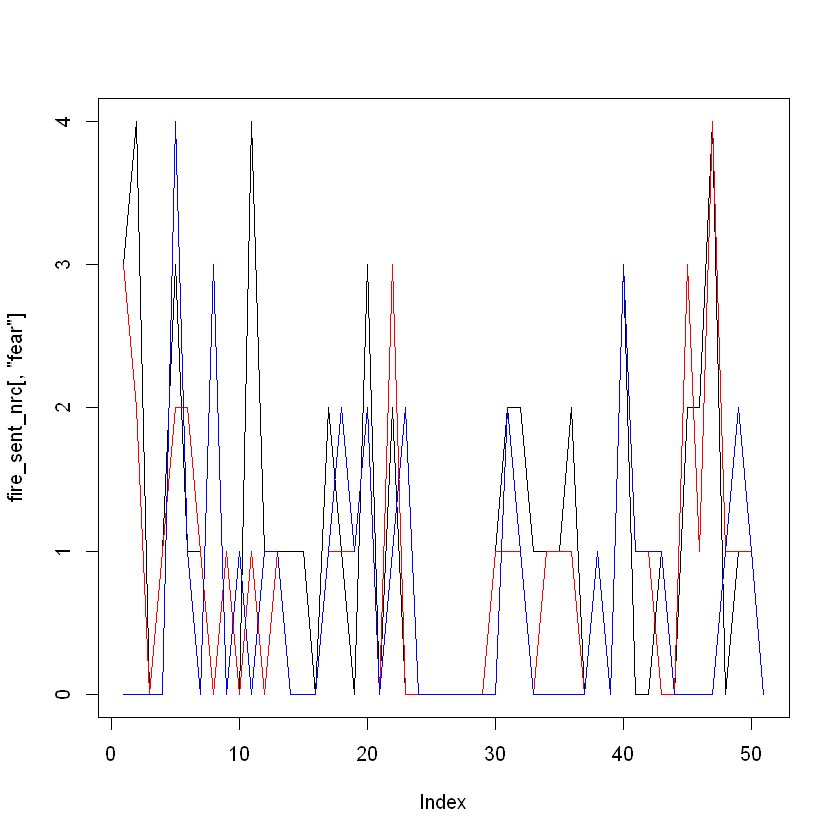

In [45]:
plot(fire_sent_nrc[,"fear"],type="l") #black line
lines(fire_sent_nrc[,"negative"],col="red")
lines(fire_sent_nrc[,"positive"],col="blue")

Interpretation of Plot above:

We can see that when fear(black line) rises so does negative sentiment(red line). We can also see that both fear and negative sentiment peak the most early on in the article and toward the end, presumably to convey the seriousness of the situation. Lastly, we can see that altough fear and negative sentiment peak higher than positive sentiment(blue line), the article ends on a positive note, likely to calm the public. 

## Political Report (CNN) Sentiment Analysis

Th following is a political news article, mainly focused around president Trump.

https://www.cnn.com/2018/10/09/politics/nikki-haley-resignation-donald-trump/index.html

In [38]:
cnn_political <- "In a political world seemingly incapable of being shocked, the resignation of United Nations Ambassador Nikki Haley on Tuesday did just that.
The most common reaction upon hearing the news, which Axios' Jonathan Swan first reported, was WHAT???? (A senior State Department official told CNN that Haley had only told her staff about her resignation Tuesday morning. Another source familiar with the matter said Haley's resignation caught national security adviser John Bolton and Secretary of State Mike Pompeo by surprise.)
And that reaction was quickly followed by WHY???
The answer to the second question is now the big story. And, in truth, we just don't totally know yet why Haley, who seemed to be one of the few Trump administration officials able to stay in the good graces of Trump, the international community and establishment Republicans all at once, would decide to simply (and suddenly) call it quits.

Trump, seeking to minimize any damage to himself from the surprise resignation, sat down with his outgoing UN ambassador shortly after the news broke and insisted he a) knew about her plans to leave last week and b) she had made the decision because she had served for two years (actually one year and seven months) and felt like it was time to go. (Haley will leave her job at the end of the year, Trump announced Tuesday.)
It's been eight years of intense times,Haley said of her time as governor of South Carolina and her time in the administration. And I am a believer in term limits. She added: I don't have anything set on where I am going to go.
And that might be true! But, the fact that neither Bolton nor Pompeo had any inkling that Haley was preparing to resign casts some doubt on the this-was-all-part-of-the-plan explanation. And, losing an Indian-American woman four weeks before an election and on the heels of a very contentious Supreme Court fight that divided deeply along gender lines suggests is far less than ideal timing for Trump.
So, what else MIGHT be beyond Haley's shock resignation? Here are a few theories:
1. She got edged out by the likes of Bolton and Pompeo
It's no secret that the national security adviser and secretary of state, respectively, are foreign policy hard-liners. And that while Haley was outwardly very tough within the UN (and the Trump administration), she was reportedly a voice urging more moderation -- and toeing the preferred line of establishment Republicans -- in private. While Haley was, without question, a star of the first year of Trump's administration, she did clash with him at times over, among other things, Russia. During a TV appearance in April, Haley announced the US would impose new sanctions on Russia. Trump insisted no such sanctions had been put in place and the White House blamed the misunderstanding on a momentary confusion on Haley's part. She quickly responded that she did not get confused.
With Bolton and Pompeo as the new shiny objects in the Trump Cabinet, Haley may have seen the writing on the wall -- and decided to leave on her own terms (before she is pushed).
2. She needed to make some money
Haley has spent a long time in elected (or appointed office). Prior to being elected governor in 2010, she spent six years as a member of the state House. Those are not hugely lucrative jobs. In 2015, the year before she was tapped to serve in the Trump administration, she and her husband reported an annual income of just over $170,000. In 2014, that number was closer to $190,000. And in 2013, Haley and her husband, Michael, reported making $270,000.
According to Haley's 2018 financial disclosure, she reported a significant number of outstanding debts, including somewhere between $25,000 and $65,000 in credit cards, a mortgage in excess of $1 million and a line of credit between $250,000 and $500,000.
Trumps big announcement on Nikki Haley

Trump's big announcement on Nikki Haley 02:04
With one child in college and another headed there in the next few years, Haley could well have been lured by the seven-figure salaries available to someone with a resume like hers in the private sector.
(Also worth noting: Over the weekend, Citizens Responsibility and Ethics in Washington, a government ethics watchdog, requested an investigation into Haley's acceptance of seven free flights from South Carolina businessmen in 2017.)
3. She wants to run for president
There's very little doubt that Haley has her eye on the White House at some point in the future. (Doubt me? Haley brought her most trusted political adviser -- and pollster -- Jon Lerner to the UN with her.) Knowing that her resignation would set off talk of a potential primary challenge to Trump in 2020, Haley laughed off the possibility during her comments on Tuesday -- making clear she plans to campaign for Trump in two years time.
In truth, Haley is too smart to run against Trump in 2020. While Trump's approval ratings are in bad shape with the broad electorate, he is among the most popular Republican presidents ever among Republican voters. No one is beating Trump in a primary in 2020 -- not Haley, not anyone.

BUT, just because Haley isn't running in 2020 doesn't mean she isn't running. Remember that whether Trump wins or loses in 2020, the 2024 Republican nomination will be open. Yes, Vice President Mike Pence is a likely candidate -- particularly if Trump wins a second term in 2020. And he will be the Trump candidate. But what if there is a desire for a candidate who has OK relations with Trump world but also is not seen as totally and completely aligned with a former president who was, to put it mildly, a non-traditional Republican candidate and president?
Enter Haley! She will have spent almost two years serving Trump, yes, but, by the time 2024 comes around, she will be six years removed from the Trump White House. Which might be a very appealing thing for Republicans.
"

In [140]:
#break up into sentences
cnn_sentences <- get_sentences(cnn_political)

In [41]:
cnn_nrc <- get_nrc_sentiment(cnn_sentences)

In [42]:
mean(cnn_nrc$positive - cnn_nrc$negative)

[1] 0.173913

As you can see above, the CNN article is overall more positive than negative. This may come as a surprise given the public turmoil between CNN and the president. Let us take a closer look at the data by plotting certain emotions.

#### Plotting CNN political Article Sentiment

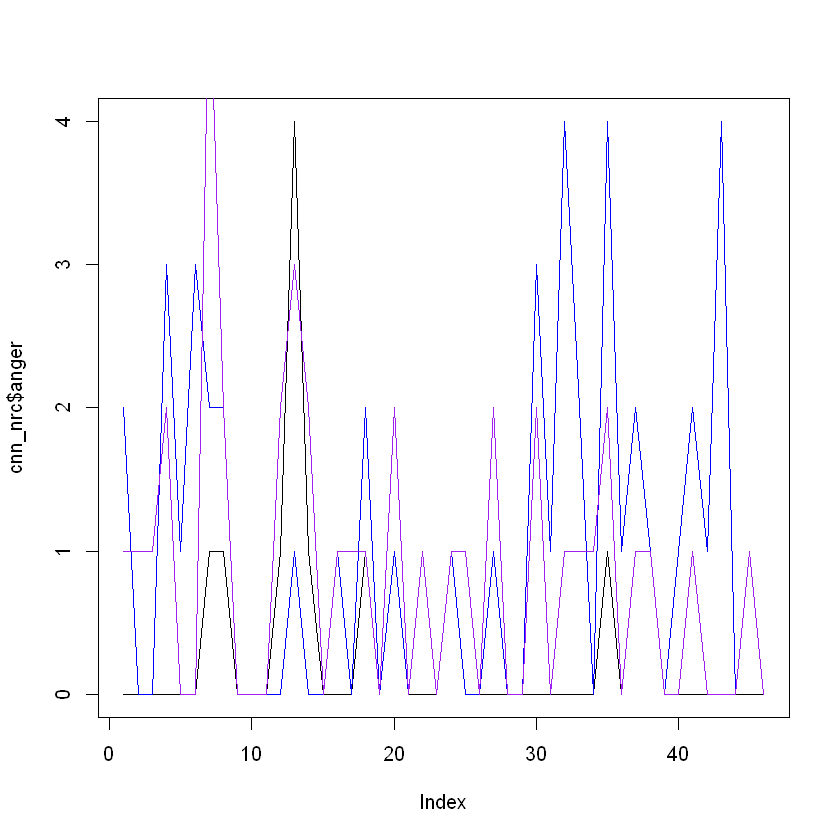

In [51]:
plot(cnn_nrc$anger,type="l") #black line 
lines(cnn_nrc$positive,col="blue")
lines(cnn_nrc$negative,col="purple")

Interpretation of plot above:

We can see that at first the article provides an emotional rollercoaster, with high frequencies of anger, negative, and positive sentiments. However, before the article ends, the sentiment is overwhelmingly positive (blue line), which is consistent with what we found earlier in our analysis. 

## Sentiment Analysis based on an Amazon Review about a Car Booster Seat

In [52]:
carseat_review <- "Extremely disappointed in this booster seat!! My teenage daughter went to move the car seat from one seat to a different seat and when doing so, the latch system completely detached from the car seat! She used barely any force when she was trying to figure out how to unlatch it! I am sick to my stomach knowing that if we had ever been in an accident, my son (or anyone else in the vehicle) could've been seriously injured or even killed due to the latch system failing and the car seat coming right off the seat!
"

In [53]:
#break up into sentences
carseat_sentences <- get_sentences(carseat_review)

In [54]:
mean(get_sentiment(carseat_sentences))

[1] -0.7125

By looking at the mean sentiment above, it is clear that the review is very negative.

In [55]:
cs_nrc <-get_nrc_sentiment(carseat_sentences)

In [56]:
summary(cs_nrc)

     anger       anticipation    disgust          fear          joy      
 Min.   :0.00   Min.   :0.0   Min.   :0.00   Min.   :0.0   Min.   :0.00  
 1st Qu.:0.75   1st Qu.:0.0   1st Qu.:0.00   1st Qu.:0.0   1st Qu.:0.00  
 Median :1.00   Median :0.0   Median :0.50   Median :0.5   Median :0.00  
 Mean   :0.75   Mean   :0.5   Mean   :0.75   Mean   :1.0   Mean   :0.25  
 3rd Qu.:1.00   3rd Qu.:0.5   3rd Qu.:1.25   3rd Qu.:1.5   3rd Qu.:0.25  
 Max.   :1.00   Max.   :2.0   Max.   :2.00   Max.   :3.0   Max.   :1.00  
    sadness        surprise        trust        negative       positive   
 Min.   :0.00   Min.   :0.00   Min.   :0.0   Min.   :0.00   Min.   :0.00  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.0   1st Qu.:0.75   1st Qu.:0.00  
 Median :0.50   Median :0.00   Median :0.5   Median :1.00   Median :0.50  
 Mean   :1.25   Mean   :0.25   Mean   :0.5   Mean   :1.50   Mean   :0.75  
 3rd Qu.:1.75   3rd Qu.:0.25   3rd Qu.:1.0   3rd Qu.:1.75   3rd Qu.:1.25  
 Max.   :4.00   Max.   :1.00   M

Interpretation:

Clearly the mean for negative sentiment (1.5) is much larger than the mean for positive sentiment (0.75). One can simply read the review and decipher that the review is negative, so the summary above simply provides further evidence about the negative nature of the review.

#### Plotting Amazon Review

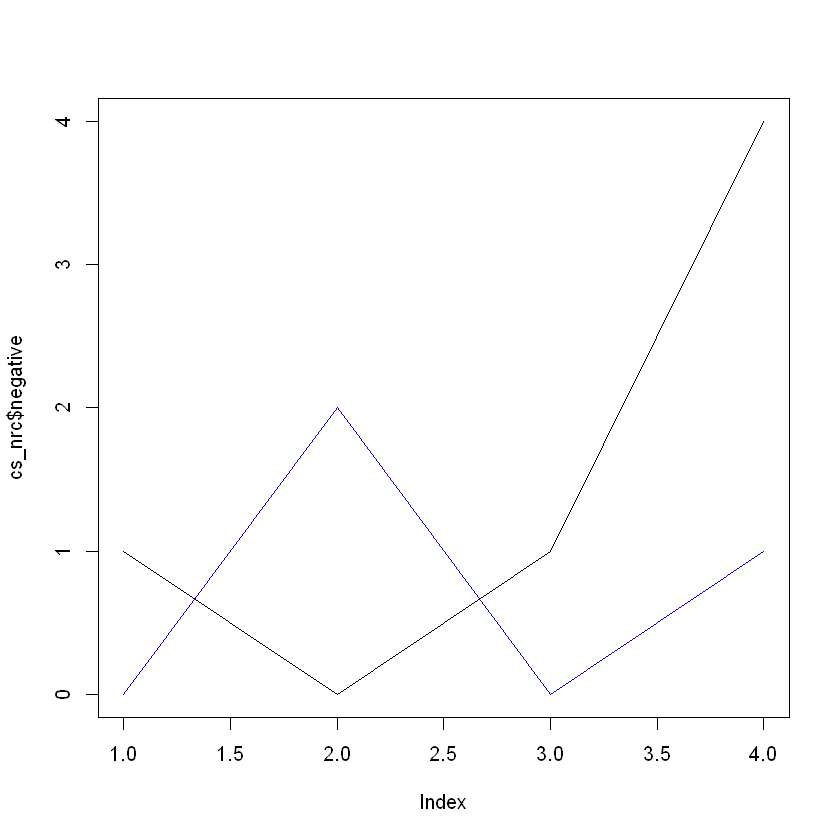

In [67]:
plot(cs_nrc$negative,type="l") #black line 
lines(cs_nrc$positive,col="blue")

You can clearly see the discprenecy between positive and negative sentiment in the review with the plot above.

## Sentiment Analysis of a Science Fiction book

Note: The text file for the book is on My Github page:

https://github.com/diego-gomez92 

In [70]:
#install.packages("readr")
library(readr)

Warning message:
"package 'readr' was built under R version 3.6.3"


In [77]:
#if you need more information on the 'readr' library, run the code below
#help(readr)

In [71]:
#read file and assign to a variable
sci_fi_story <- read_file("oceanDepths.txt")

In [73]:
#break up into sentences
ocean_sentence <- get_sentences(sci_fi_story)
mean(get_sentiment(ocean_sentence))

[1] 0.05324074

The book is slightly positive. 

In [74]:
print(length(ocean_sentence))
ocean_nrc <- get_nrc_sentiment(ocean_sentence)

[1] 648


In [82]:
nrow(ocean_nrc)

The book is 648 sentences long. 

In [76]:
summary(ocean_nrc)

     anger         anticipation       disgust            fear       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1559   Mean   :0.2886   Mean   :0.1188   Mean   :0.2392  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :5.0000   Max.   :5.0000   Max.   :6.0000   Max.   :7.0000  
      joy            sadness          surprise          trust      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.000  
 Mean   :0.2191   Mean   :0.2022   Mean   :0.1451   Mean   :0.338  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :3.0000   Max.   :6.0000   Max.   :2.0000   Max.   :3.000  
    negative         positive     
 Min. 

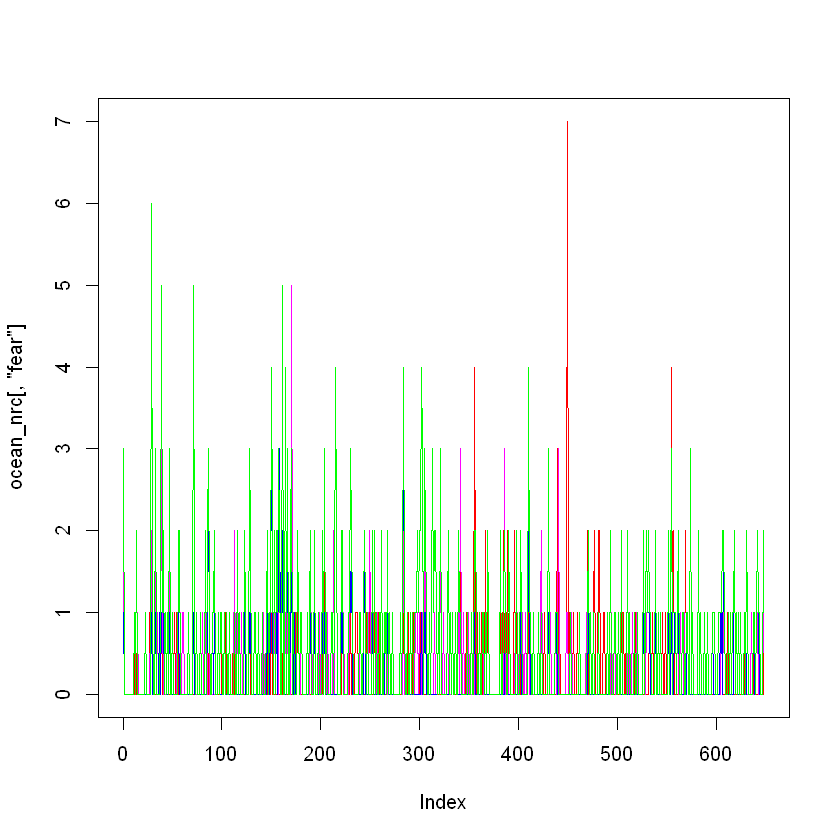

In [88]:
plot(ocean_nrc[,'fear'],type="l",col="red")
lines(ocean_nrc[,'anticipation'],col="magenta")

lines(ocean_nrc[,'joy'],col="blue")
lines(ocean_nrc[,'positive'],col="green")

Interpretation:

By looking at the plot, we can see that the author is providing us with a positive(green) and joyful(blue) begining to the story. However, around the climax of the book, we can see a huge spike in both anticipation (magenta) and fear (red). After the climax passes, we can see that once again positivity and joy become the dominant emotions of the story. This coincides with conflict resoultion after a climatic event, which is common in most stories. 

The power of sentiment analysis is that we can clearly see the author's intentions by looking at what emotions take center stage at certain points thorughout their book. Evidently, the author aims to ellicit different emotions in the reader in accordance with the events unfolding in the story. 

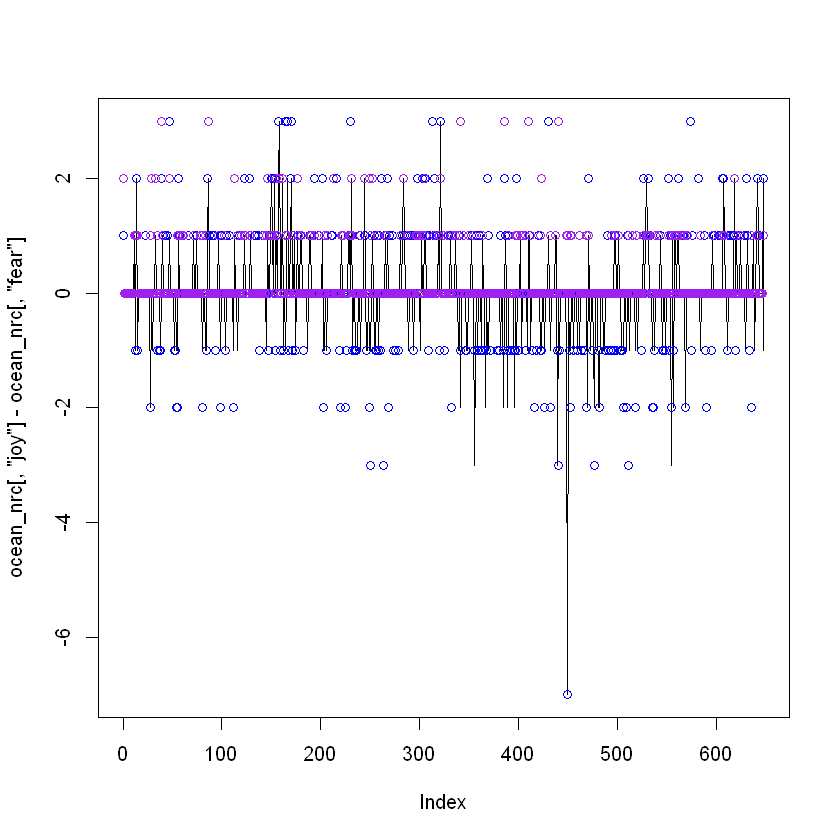

In [89]:
#this plot provides further evidence about shifts in emotional tone throughout the story
plot(ocean_nrc[,'joy'] - ocean_nrc[,'fear'],type='l')
points(ocean_nrc[,'positive'] - ocean_nrc[,'negative'],col="blue")
points(ocean_nrc[,'anticipation'],col="purple")

## Blog Post SJSU Sentiment Analysis

This blog post has to do with women in sports and how their involvement has evolved over the decades. To read more, follow the link provided.

https://blogs.sjsu.edu/wsq/2019/02/06/shirley-reekie-sailor-rower-professor/

In [90]:
sjsu_txt <- "Kinesiology Professor Shirley Reekie first learned about Margaret Jenkins, San Jose State’s first Olympian, after the 1984 Olympics in Los Angeles. Reekie had joined the faculty at SJSU in 1982, not long after writing a dissertation on the history of woman participation in sport in Great Britain. Drawn to Jenkins’ story, Reekie sparked a friendship with the decorated athlete and invited her to speak to her class.

“She was a feisty old bird,” says Reekie. “And I mean that in the nicest possible way. When she was a student at San Jose State, she was picked for the 1928 Olympic team. She had done most of her training in javelin but switched to discus on hearing that javelin was not included for women. But when she returned from Amsterdam, having finished sixth, she told me she was failed in a class in the women’s PE department because she had been, quote, ‘too competitive.'”

In the early 1920s, woman student-athletes at San Jose State (then San Jose Teachers College) were given two options: participate in friendly “play days,” where they would play on teams with other colleges, as opposed to against them, and telegraphic meets. Jenkins and her teammates were not allowed to compete in the company of their opponents—to do so would foster too much competitive spirit, which was associated with myths about the alleged stress that athletics could have on the female body. Instead, athletes would compete on their home campuses in sports like swimming or track and field and have their scores communicated via telegraph to learn the results.

Through her research, Reekie learned that the way sport was marketed in the early 20th century impacted who competed—and to what extent they could compete. Her book Bean Bags to Bod Pods: A History of 150 Years of San Jose State University’s Department of Kinesiology (Mill City Press 2012) explores shifting cultural attitudes about gender and sport. Among the myths she uncovered: Women were “too highly strung emotionally;” they would develop an “undesirable notoriety” and their menstrual cycles would somehow interfere with their participation. (Reekie 84) Despite these popular beliefs, many woman student-athletes like Jenkins pursued sport at San Jose State."

In [99]:
#break up into sentences
sjsu_sent <- get_sentences(sjsu_txt)

In [100]:
mean(get_sentiment(sjsu_sent))

[1] 0.5666667

In [104]:
sjsu_nrc <- get_nrc_sentiment(sjsu_sent)

In [105]:
summary(sjsu_nrc)

     anger      anticipation    disgust            fear             joy        
 Min.   :0.0   Min.   :0.0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0   Median :0.0   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.2   Mean   :0.4   Mean   :0.1333   Mean   :0.2667   Mean   :0.1333  
 3rd Qu.:0.0   3rd Qu.:1.0   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :2.0   Max.   :1.0   Max.   :2.0000   Max.   :2.0000   Max.   :1.0000  
    sadness           surprise           trust           negative  
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0  
 Median :0.00000   Median :0.00000   Median :0.0000   Median :0.0  
 Mean   :0.06667   Mean   :0.06667   Mean   :0.3333   Mean   :0.4  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:1.0  
 Max.   :1.00000   Max.   :1.000

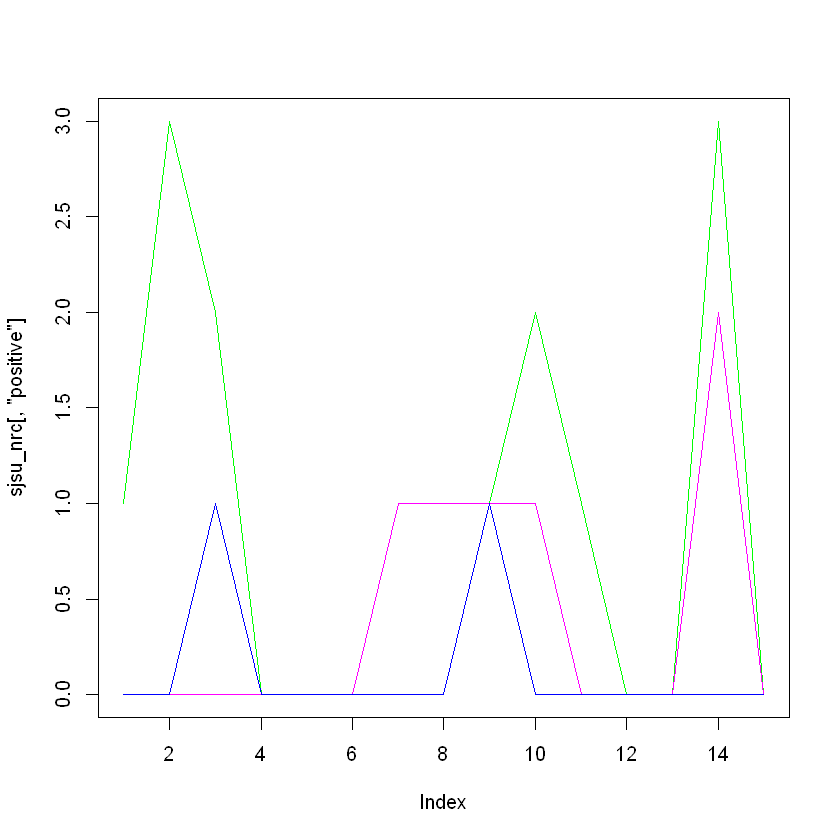

In [110]:
plot(sjsu_nrc[,'positive'],col="green", type='l')
lines(sjsu_nrc[,'negative'],col="magenta")
lines(sjsu_nrc[,'joy'],col="blue")

Interpreation:

We can see that the blog post is overall positive but with some negative aspects. This is not surpsising since the blog post covers the injustices made against women in sports in past decades and the insparational figures that broke those barriers. 

## The Woman Of Stone Sentiment Analysis

Another short story. See the link provided for further information.

https://en.wikisource.org/wiki/The_Face_and_the_Mask/The_Woman_of_Stone

In [111]:
woman_stone <- "THE WOMAN OF STONE.


Lurine, was pretty, _petite_, and eighteen. She had a nice
situation at the Pharmacie de Siam, in the Rue St. Honoré. She had no
one dependent upon her, and all the money she earned was her own. Her
dress was of cheap material perhaps, but it was cut and fitted with
that daintiness of perfection which seems to be the natural gift of the
Parisienne, so that one never thought of the cheapness, but admired
only the effect, which was charming. She was book-keeper and general
assistant at the Pharmacie, and had a little room of her own across the
Seine, in the Rue de Lille. She crossed the river twice every day--once
in the morning when the sun was shining, and again at night when the
radiant lights along the river's bank glittered like jewels in a long
necklace. She had her little walk through the Gardens of the Tuileries
every morning after crossing the Pont Royal, but she did not return
through the gardens in the evening, for a park in the morning is a
different thing to a park at night. On her return she always walked
along the Rue de Tuileries until she came to the bridge. Her morning
ramble through the gardens was a daily delight to her, for the Rue de
Lille is narrow, and not particularly bright, so it was pleasant to
walk beneath the green trees, to feel the crisp gravel under her feet,
and to see the gleaming white statues in the sunlight, with the sparkle
on the round fountain pond, by the side of which she sometimes sat. Her
favorite statue was one of a woman that stood on a pedestal near the
Rue de Rivoli. The arm was thrown over her head, and there was a smile
on the marble face which was inscrutable. It fascinated the girl as she
looked up to it, and seemed to be the morning greeting to her busy
day's work in the city. If no one was in sight, which was often the
case at eight o'clock in the morning, the girl kissed the tips of her
fingers, and tossed the salute airily up to the statue, and the woman
of stone always smiled back at her the strange mystical smile which
seemed to indicate that it knew much more of this world and its ways
than did the little Parisienne who daily gazed up at her.

Lurine was happy, as a matter of course, for was not Paris always
beautiful? Did not the sun shine brightly? And was not the air always
clear? What more, then, could a young girl wish? There was one thing
which was perhaps lacking, but that at last was supplied; and then
there was not a happier girl in all Paris than Lurine. She almost cried
it aloud to her favorite statue the next morning, for it seemed to her
that the smile had broadened since she had passed it the morning
before, and she felt as if the woman of stone had guessed the secret of
the woman of flesh."

In [112]:
#break up into sentences
woman_stone_sent <- get_sentences(woman_stone)

In [113]:
get_sentiment(woman_stone_sent)

[1]  0.00  1.35  1.00  0.60  2.75 -0.10  3.05  0.00 -0.50  2.50  0.25  0.75
[13]  1.35  1.30  1.50  1.70  0.50  1.20 -0.25  0.50

In [121]:
nrc_women_sent <-get_nrc_sentiment(woman_stone_sent)

In [122]:
summary(nrc_women_sent)

     anger      anticipation     disgust          fear           joy     
 Min.   :0.0   Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.0  
 1st Qu.:0.0   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.0  
 Median :0.0   Median :0.00   Median :0.00   Median :0.00   Median :1.0  
 Mean   :0.2   Mean   :0.85   Mean   :0.05   Mean   :0.05   Mean   :1.1  
 3rd Qu.:0.0   3rd Qu.:1.00   3rd Qu.:0.00   3rd Qu.:0.00   3rd Qu.:2.0  
 Max.   :1.0   Max.   :5.00   Max.   :1.00   Max.   :1.00   Max.   :5.0  
    sadness       surprise       trust      negative       positive   
 Min.   :0.0   Min.   :0.0   Min.   :0   Min.   :0.00   Min.   :0.00  
 1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0   1st Qu.:0.00   1st Qu.:0.75  
 Median :0.0   Median :0.5   Median :1   Median :1.00   Median :1.00  
 Mean   :0.3   Mean   :0.6   Mean   :1   Mean   :0.65   Mean   :1.55  
 3rd Qu.:1.0   3rd Qu.:1.0   3rd Qu.:1   3rd Qu.:1.00   3rd Qu.:2.25  
 Max.   :1.0   Max.   :2.0   Max.   :4   Max.   :2.00   

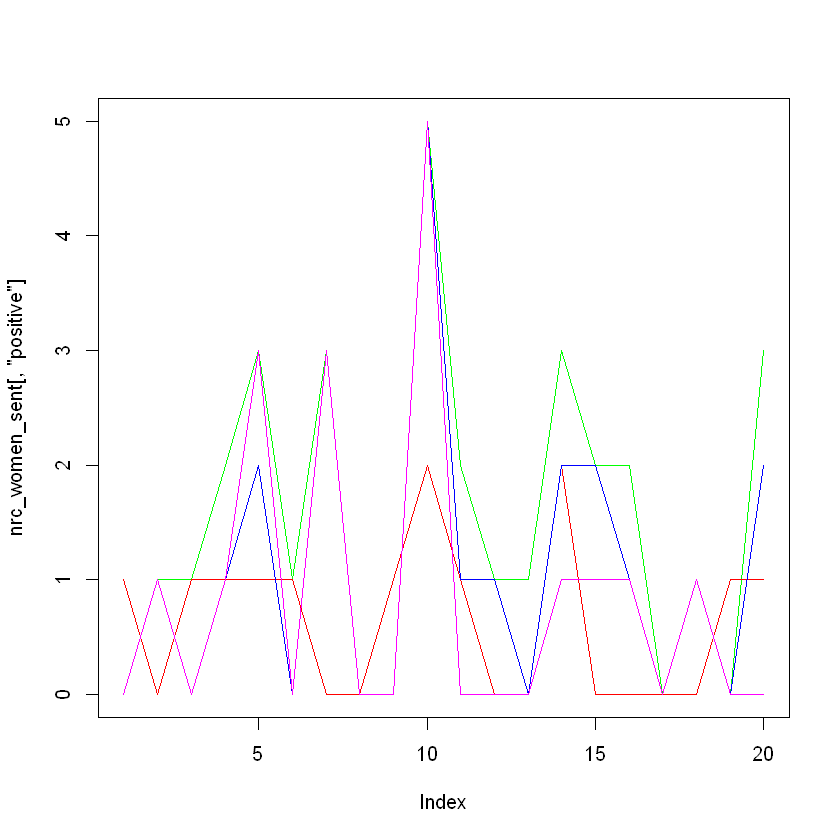

In [128]:
plot(nrc_women_sent[,'positive'], col="green", type='l')
lines(nrc_women_sent[,'negative'], col="red")
lines(nrc_women_sent[,'joy'], col="blue")
lines(nrc_women_sent[,'anticipation'], col="magenta")

Interpreation:

By looking at the plot, we can see similar patterns of emotional shifts throughout the text. More notibaly, we can see the anticipation around the middle and we can also see that the the text ends on a joyful and positive tone as we would expect.

## Limitations of Sentiment Analysis

Let us create some interesting text. Then, let us see what our sentiment analysis discovers about the contents of the text. 

In [129]:
test.txt <- "i do not love R. It isn't my favorite language. It is my 23rd favorite language."

In [130]:
#break up into sentences
test.sent <- get_sentences(test.txt)

In [132]:
test.sent

[1] "i do not love R."                 "It isn't my favorite language."  
[3] "It is my 23rd favorite language."

In [133]:
get_sentiment(test.sent)

[1] 0.75 0.75 0.75

In [139]:
mean(get_sentiment(test.sent))

[1] 0.75

Surprisingly, the the mean sentiment above is overwhelmingly positive. But why? Let us look into the content of the text further. 

In [137]:
test.nrc <- get_nrc_sentiment(test.sent)

In [135]:
test.nrc

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0,0,0,0,1
0,0,0,0,1,0,0,1,0,1
0,0,0,0,1,0,0,1,0,1


Interpretation:

Why did the sentiment analysis misinterpret the sentences as having a positive sentiment when clearly they are negative? In short, it missed the sarcasm, double negatives, and cynism. For example, the sentence 'i do not love R' can become 'i love R', which is why it has a positive sentiment of .75. 

This is one of the shortcomings of some forms of sentiment analysis. For example, if you look at tweets with dry humor, sarcasm, or cynism, you might miss the sentiment completely.

Solutions:

Companies build phrases that look for a negator in a sentence (like 'not') and take the following words and invert the sentiment. This solution has problems however. For instance, what is the opposite of surprise? We cannot say that one emotion is the opposite of the other. Another example, what is the opposite of trust? Clearly there are no answers to such questions. Another potential solution is that you can build your own dictionary (e.g., analyze a speech of someone), but this is resource intensive. Lastly, the longer the text you analyze the more likely you are to get an accurate sentiment rating on the content of the document simply because more sentences will have an accurate sentiment associated with them. In other words, if you analyze a large enough document,  you can get a good sense of the sentiment in that document. If you are not careful, however, you can misintrepret the sentiment when cynism, sacrasm, etc., are heavily present in the text. 

# Conclusion

This project provided various examples of how one can use sentiment analysis. The content of the text one wishes to analyze can essentially be of any type. From blogs to books to articles, the reader has a considerable amount of liberty on choosing the content on which they wish to conduct a sentiment analysis. Just be careful with you interpretation of the analysis as the last section mentioned.